In [8]:
import json
import codecs
import itertools
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from nltk import sent_tokenize, word_tokenize


def cooccurrence(text, cast):
    possible_pairs = list(itertools.combinations(cast, 2))
    cooccurring = dict.fromkeys(possible_pairs, 0)
    for title, chapter in text['chapters'].items():
        for sent in sent_tokenize(chapter):
            for pair in possible_pairs:
                if pair[0] in sent and pair[1] in sent:
                    cooccurring[pair] += 1
    return cooccurring

def matrix(text, cast):
    mtx = []
    for first in cast:
        row = []
        for second in cast:
            count = 0
            for title, chapter in text['chapters'].items():
                for sent in sent_tokenize(chapter):
                    if first in sent and second in sent:
                        count += 1
            row.append(count)
        mtx.append(row)
    return mtx


if __name__ == '__main__':
    # File contains a list of characters, reverse sorted by frequency
    # And a dict with {chapter title: chapter text} key-value pairs
    with codecs.open('atap-master/snippets/ch08/data/oz.json', 'r', 'utf-8-sig') as data:
        text = json.load(data)
        cast = text['cast']


In [10]:
##############################################
# Build a NetworkX Graph
##############################################
# G = nx.Graph()
# G.name = "The Social Network of Oz"
# pairs = cooccurrence(text, cast)
# for pair, wgt in pairs.items():
#     if wgt>0:
#         G.add_edge(pair[0], pair[1], weight=wgt)
# # Make Dorothy the center
# D = nx.ego_graph(G, "Dorothy")
# edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())
# # Push nodes away that are less related to Dorothy
# pos = nx.spring_layout(D, k=.5, iterations=40)
# nx.draw(D, pos)#, node_color="gold", node_size=50, edgelist=edges, width=0.5, edge_color="orange", with_labels=True, font_size=12)
# plt.show()

In [13]:
text

{'cast': ['Dorothy',
  'Scarecrow',
  'Oz',
  'Tin Woodman',
  'Toto',
  'Wicked Witch',
  'Winkies',
  'Winged Monkeys',
  'Aunt Em',
  'Cowardly Lion',
  'Munchkins',
  'Glinda',
  'Uncle Henry',
  'Stork',
  'Quelala',
  'Kalidahs',
  'Quadlings',
  'Gayelette',
  'Boq',
  'Monkey King',
  'Hammer-Heads',
  'King Crow',
  'Mr. Joker',
  'china Princess',
  'Green Girl'],
 'chapters': {'1.The Cyclone': "Dorothy lived in the midst of the great Kansas prairies, with Uncle Henry, who was a farmer, and Aunt Em, who was the farmer's wife. Their house was small, for the lumber to build it had to be carried by wagon many miles. There were four walls, a floor and a roof, which made one room; and this room contained a rusty looking cookstove, a cupboard for the dishes, a table, three or four chairs, and the beds. Uncle Henry and Aunt Em had a big bed in one corner, and Dorothy a little bed in another corner. There was no garret at all, and no cellar--except a small hole dug in the ground, cal

In [14]:
cast

['Dorothy',
 'Scarecrow',
 'Oz',
 'Tin Woodman',
 'Toto',
 'Wicked Witch',
 'Winkies',
 'Winged Monkeys',
 'Aunt Em',
 'Cowardly Lion',
 'Munchkins',
 'Glinda',
 'Uncle Henry',
 'Stork',
 'Quelala',
 'Kalidahs',
 'Quadlings',
 'Gayelette',
 'Boq',
 'Monkey King',
 'Hammer-Heads',
 'King Crow',
 'Mr. Joker',
 'china Princess',
 'Green Girl']

In [15]:
mtx

[[354,
  53,
  41,
  24,
  39,
  18,
  7,
  6,
  11,
  5,
  6,
  5,
  5,
  5,
  0,
  2,
  2,
  0,
  1,
  1,
  3,
  1,
  1,
  0,
  0],
 [53,
  216,
  18,
  33,
  13,
  4,
  5,
  4,
  3,
  2,
  0,
  4,
  0,
  4,
  0,
  1,
  1,
  0,
  0,
  0,
  2,
  1,
  0,
  0,
  0],
 [41,
  18,
  151,
  10,
  2,
  10,
  2,
  1,
  3,
  3,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [24,
  33,
  10,
  114,
  4,
  2,
  2,
  2,
  1,
  2,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [39,
  13,
  2,
  4,
  90,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [18,
  4,
  10,
  2,
  0,
  58,
  6,
  1,
  1,
  1,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [7, 5, 2, 2, 1, 6, 27, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [6, 4, 1, 2, 1, 1, 2, 28, 0, 0, 0, 4, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0],
 [11, 3, 3, 1, 1, 1, 0, 0, 23, 0, 0, 1, 6, 0, 0, 0, 0, 

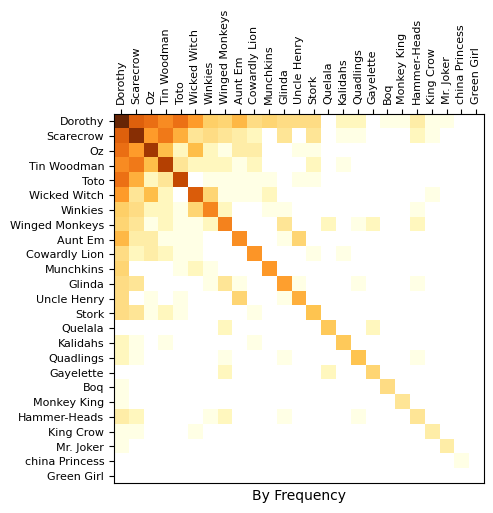

In [12]:
##############################################
# Plot a Co-Occurrence Matrix
##############################################

# First make the matrices
# By frequency
mtx = matrix(text,cast)


# Now create the plots
fig, ax = plt.subplots()
# fig.suptitle('Character Co-occurrence in the Wizard of Oz', fontsize=12)
fig.subplots_adjust(wspace=.75)

n = len(cast)
x_tick_marks = np.arange(n)
y_tick_marks = np.arange(n)

ax1 = plt.subplot(111)
ax1.set_xticks(x_tick_marks)
ax1.set_yticks(y_tick_marks)
ax1.set_xticklabels(cast, fontsize=8, rotation=90)
ax1.set_yticklabels(cast, fontsize=8)
ax1.xaxis.tick_top()
ax1.set_xlabel("By Frequency")
plt.imshow(mtx, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')

# ax2 = plt.subplot(122)
# ax2.set_xticks(x_tick_marks)
# ax2.set_yticks(y_tick_marks)
# ax2.set_xticklabels(alpha_cast, fontsize=8, rotation=90)
# ax2.set_yticklabels(alpha_cast, fontsize=8)
# ax2.xaxis.tick_top()
# ax2.set_xlabel("Alphabetically")
# plt.imshow(alpha_mtx, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')
plt.show()

/var/folders/8k/v_790m6j3ksgsl4j86kmxvsw0000gn/T/ipykernel_16907/3108218562.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


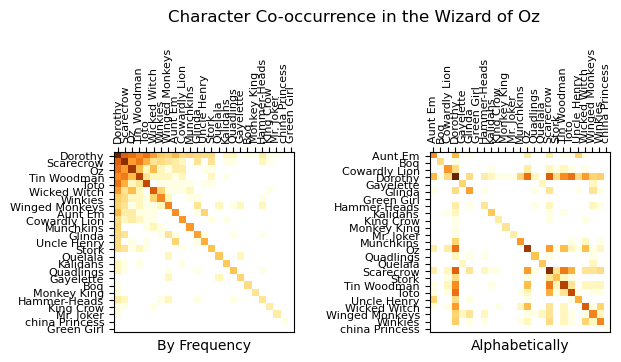

In [9]:

# First make the matrices
# By frequency
mtx = matrix(text,cast)
# And alphabetically
alpha_cast = sorted(cast)
alpha_mtx = matrix(text,alpha_cast)

# Now create the plots
fig, ax = plt.subplots()
fig.suptitle('Character Co-occurrence in the Wizard of Oz', fontsize=12)
fig.subplots_adjust(wspace=.75)

n = len(cast)
x_tick_marks = np.arange(n)
y_tick_marks = np.arange(n)

ax1 = plt.subplot(121)
ax1.set_xticks(x_tick_marks)
ax1.set_yticks(y_tick_marks)
ax1.set_xticklabels(cast, fontsize=8, rotation=90)
ax1.set_yticklabels(cast, fontsize=8)
ax1.xaxis.tick_top()
ax1.set_xlabel("By Frequency")
plt.imshow(mtx, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')

ax2 = plt.subplot(122)
ax2.set_xticks(x_tick_marks)
ax2.set_yticks(y_tick_marks)
ax2.set_xticklabels(alpha_cast, fontsize=8, rotation=90)
ax2.set_yticklabels(alpha_cast, fontsize=8)
ax2.xaxis.tick_top()
ax2.set_xlabel("Alphabetically")
plt.imshow(alpha_mtx, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')
plt.show()


In [ ]:






#
# ##############################################
# # Plot mentions of characters through chapters
# ##############################################
# oz_words = []
# headings = []
# chap_lens = []
# for heading, chapter in text['chapters'].items():
#     # Collect the chapter headings
#     headings.append(heading)
#     for sent in sent_tokenize(chapter):
#         for word in word_tokenize(sent):
#             # Collect all of the words
#             oz_words.append(word)
#     # Record the word lengths at each chapter
#     chap_lens.append(len(oz_words))
#
# # Mark where chapters start
# chap_starts = [0] + chap_lens[:-1]
# # Combine with chapter headings
# chap_marks = list(zip(chap_starts,headings))
#
# cast.reverse()
# points = []
# # Add a point for each time a character appears
# for y in range(len(cast)):
#     for x in range(len(oz_words)):
#         # Some characters have 1-word names
#         if len(cast[y].split()) == 1:
#             if cast[y] == oz_words[x]:
#                 points.append((x,y))
#         # Some characters have 2-word names
#         else:
#             if cast[y] == ' '.join((oz_words[x-1], oz_words[x])):
#                 points.append((x,y))
# if points:
#     x, y = list(zip(*points))
# else:
#     x = y = ()
#
# # Create the plot
# fig, ax = plt.subplots(figsize=(12,6))
# # Add vertical lines labeled for each chapter start
# for chap in chap_marks:
#     plt.axvline(x=chap[0], linestyle='-',
#         color='gainsboro')
#     plt.text(chap[0], -2, chap[1], size=6, rotation=90)
# # Plot the character mentions
# plt.plot(x, y, "|", color="darkorange", scalex=.1)
# plt.tick_params(
#     axis='x', which='both', bottom='off', labelbottom='off'
# )
# plt.yticks(list(range(len(cast))), cast, size=8)
# plt.ylim(-1, len(cast))
# plt.title("Character Mentions in the Wizard of Oz")
# plt.show()